## Description

K Nearest Neighbors is an Supervised Learning algorithm usually used for classification. It stores all available cases and provides classification for new ones based on it's similarity to stored cases. 

### Setup
---
Given a vector $c$ of $l$ ($l \geq 2$) **classes** (categories, describing some sample e.g. flower species, item type):

$$
c = [c_{0}, c_{1}, c_{2}, \dots, c_{l}]
$$

---
Given a group of representative samples, stored inside matrix $X_{rep}$ of size $m \times n$, and given a vector $y_{rep}$ of size $m$, storing one classes from vector $c$ for each sample of matrix $X_{rep}$:

$$
X_{rep} = 
\begin{bmatrix}
x_{00} & x_{01} & x_{02} & \dots & x_{0n} \\
x_{10} & x_{11} & x_{12} & \dots & x_{1n} \\
x_{20} & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{m0} & x_{m1} & x_{m2} & \dots & x_{mn} \\
\end{bmatrix}
,
y_{rep} = 
\begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
\vdots \\
y_{m} \\
\end{bmatrix}
$$

where:
- $ m $ - number of samples
- $ n $ - number of features

--- 
Given a group of samples stored in matrix $X_{new}$ of size $o \times n$, which are different than those stored inside $X_{rep}$ matrix:

$$
X_{new} = 
\begin{bmatrix}
x_{00} & x_{01} & x_{02} & \dots & x_{0n} \\
x_{10} & x_{11} & x_{12} & \dots & x_{1n} \\
x_{20} & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{o0} & x_{o1} & x_{o2} & \dots & x_{on} \\
\end{bmatrix}
$$

where:
- $ o $ - number of samples
- $ n $ - number of features

### Goal

The goal is to assign one of classes from vector $c$ for each one of $o$ samples stored inside matrix $X_{new}$ with usage of `KNN` algorithm.

### Algorithm
For given sample $x_{i}$ ($i\in{o}$) of matrix $X_{new}$, `KNN` calculates **distance** between every sample $x_{j}$ ($j\in{m}$) from matrix $X_{rep}$ and given sample $x_{i}$. The distances are sorted and group of $k$ **neighbors** (samples from matrix $X_{rep}$ which distance is closest to sample $x_{i}$) is selected. Class assigned to sample $x_{i}$ is the most appearing class inside selected group of $k$ neighbors (this process is called **vote**). To avoid draw during vote process, value of $k$ should not be divisible by $l$.

### Distance
The `KNN` can use various distance metrics for comparing vectors representing samples. Most common distances are `Euclidean Distance` and `Manhattan Distance`:

#### 1. Euclidean Distance

$$d(p,q) = \sum_{i=1}^{n}\sqrt{(p_{i} - q_{i})^2}$$

where:
- $p$ - vector
- $q$ - vector
- $n$ - number of elements

#### 2. Manhattan Distance

$$d(p,q) = \sum_{i=1}^{n}|p_{i} - q_{i}|$$

where:
- $p$ - vector
- $q$ - vector
- $n$ - number of elements


## Code

### Imports

In [114]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

### Loading data

In [115]:
def load_data():
    """Function loads dictionary containing iris dataset from scikit-learn
    library and splits samples in stratified way, in 0.8/0.2 ratio, into 
    train and test datasets.
    """
    iris = load_iris()
    samples, targets = iris["data"], iris["target"]
    return train_test_split(
        samples, targets, 
        test_size=0.2, 
        stratify=targets,
        shuffle=True, 
        random_state=42
    )

### Distance

In [116]:
def euclidean_distance(P, Q):
    """Function returning row-wise Euclidean Distance values for 
    matrices P and Q. Works with just vectors.
    """
    return np.linalg.norm(P - Q, axis=1)

def manhattan_distance(P, Q):
    """Function returning row-wise Manhattan Distance values for 
    matrices P and Q. Works with just vectors.
    """
    return np.abs(P - Q).sum(axis=1)

### KNN

In [117]:
class KNN:
    """K Nearest Neighbor algorithm implementation"""
    
    def __init__(self, k, distance_func):
        """Constructor of KNN function.
        
        Parameters:
        -----------
        k: int
            Number of neighbors that will be used in class vote.
        distance_func: function
            Function for calculating distance between samples.
        """
        
        self.k = k
        self.distance_func = distance_func
        
    def _calculate_distances(self, X_rep, sample):
        """Calculate distance according to distance_func between single sample and all samples from
        X_rep matrix.
        
        Parameters:
        -----------
        sample: numpy.ndarray
            Vector containing feature values of single sample.
        X_rep: numpy.ndarray
            Matrix of samples based on which predictions will be made.
        
        Returns:
        -----------
        distances: numpy.ndarray
            Returns 1-dimensional ndarray containing calculated distances.
        """
        distances = self.distance_func(X_rep, sample)
        return distances
    
    def _get_k_neighbors(self, distances):
        """Returns indices of k lowest numbers in distances ndarray.
        
        Parameters:
        -----------
        distances: numpy.ndarray
            1-dimensional ndarray containing distances between single sample and all samples in 
            X_rep matrix.
        
        Returns:
        -----------
        top_k_neighbours: numpy.ndarray
            Returns 1-dimensional ndarray with indices of lowest k numbers in distances ndarray.
        """
        top_k_neighbours = np.argpartition(distances, self.k)[:self.k]
        return top_k_neighbours
    
    def _vote(self, neighbors, y_rep):
        """Returns most frequent class id in neighbour group.
        
        Parameters:
        -----------
        neighbors: numpy.ndarray
            1-dimensional ndarray with indices of lowest k numbers in distances ndarray.
        y_rep: numpy.ndarray
            Vector containing class ids for each row in matrix X_rep.
        
        Returns:
        -----------
        most_frequent_class: int
            Returns most frequent class id.
        """
        most_frequent_class = np.bincount(y_rep[neighbors]).argmax()
        return most_frequent_class
        
    def _predict_for_sample(self, sample, X_rep, y_rep):
        """Implementation of KNN for single sample:
        1. Calculates distance betwen sample and all rows of X_rep.
        2. Sorts calculated distances and picks ids of rows which distance 
           is closest to sample.
        3. Selects subset of k labels from vector y_rep based on previously
           picked indices.
        4. Returns most appearing class.
        
        Parameters:
        -----------
        sample: numpy.ndarray
            Vector containing feature values of single sample.
        X_rep: numpy.ndarray
            Matrix of samples based on which predictions will be made.
        y_rep: numpy.ndarray
            Vector containing class ids for each row in matrix X_rep.
            
        Returns:
        -----------
        predicted_class: int
            Returns class id of most similar class to given sample.
        """
        distances = self._calculate_distances(X_rep, sample)
        k_neighbors = self._get_k_neighbors(distances)
        predicted_class = self._vote(k_neighbors, y_rep)
        return predicted_class
            
    def predict(self, X_new, X_rep, y_rep):
        """Function that for each row of matrix X_new performs classification 
        based on matrix X_rep and it's labels y_rep.
        
        Parameters:
        -----------
        X_new: numpy.ndarray
            Matrix of samples for which predictions will be made.
        X_rep: numpy.ndarray
            Matrix of samples based on which predictions will be made.
        y_rep: numpy.ndarray
            Vector containing class ids for each row in matrix X_rep.
            
        Returns:
        -----------
        result: numpy.ndarray
            Vector containing predicted class ids for each row in 
            matrix X_new.
        """
        return np.array([self._predict_for_sample(s, X_rep, y_rep) for s in X_new])

## Usage

In [118]:
# Loading data
X_rep, X_new, y_rep, y_new = load_data()
print("X_rep matrix size: {}".format(X_rep.shape))
print("y_rep vector size: {}".format(y_rep.shape))
print("X_new matrix size: {}".format(X_new.shape))
print("y_new vector size: {}".format(y_new.shape))
print("\n----\n")

# Creating KNN object
knn = KNN(k=5, distance_func=euclidean_distance)

# Making prediction
pred = knn.predict(X_new, X_rep, y_rep)
print("Prediction vector: {}".format(pred))
print("  Expected values: {}".format(y_new))
print("\n----\n")

# Evaluation
accuracy = accuracy_score(pred, y_new)
print("Prediction accuracy: {}%".format(accuracy * 100.0))

X_rep matrix size: (120, 4)
y_rep vector size: (120,)
X_new matrix size: (30, 4)
y_new vector size: (30,)

----

Prediction vector: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
  Expected values: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]

----

Prediction accuracy: 100.0%


## Visualisation

For more intuitive visualisation, only two features describing flowers will be used.

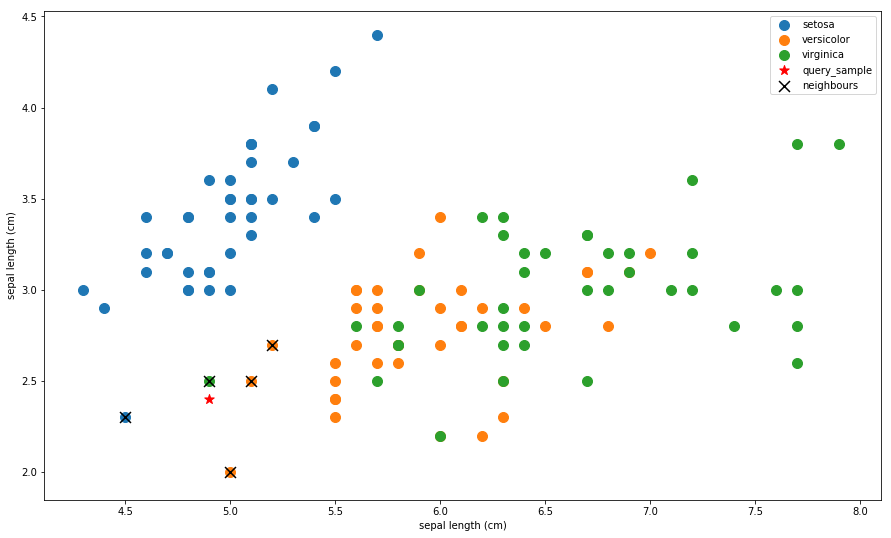

In [132]:
# Loading data
X_rep, X_new, y_rep, y_new = load_data()

# Leaving only first two features
X_rep = X_rep[:, :2]
X_new = X_new[:, :2]

# Selecting random sample
sample_id = 2
sample = X_new[sample_id]
sample_class = y_new[sample_id]

# Creating KNN object
knn = KNN(k=5, distance_func=euclidean_distance)

# Selecting neighbours
knn_distances = knn._calculate_distances(X_rep, sample)
neighbor_ids = knn._get_k_neighbors(knn_distances)

# Visualisation
plt.figure(figsize=(15, 9))
plt.scatter(X_rep[y_rep == 0][:, 0], X_rep[y_rep == 0][:, 1], s=100, label="setosa")
plt.scatter(X_rep[y_rep == 1][:, 0], X_rep[y_rep == 1][:, 1], s=100, label="versicolor")
plt.scatter(X_rep[y_rep == 2][:, 0], X_rep[y_rep == 2][:, 1], s=100, label="virginica")
plt.scatter([sample[0]], [sample[1]], color="red", s=100, label="query_sample", marker="*")
plt.scatter(X_rep[neighbor_ids, 0], X_rep[neighbor_ids, 1], 
            color="black", s=120, label="neighbours", marker="x")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal length (cm)")
plt.legend();

As visible inside 5 closest neighbours there are 3 samples of class veriscolor and 1 sample of class setos and virginica.

In [120]:
y_rep[neighbor_ids]

array([1, 1, 1, 2, 0])

Therefore prediction should be `veriscolor` - so class_id equal to 1

In [121]:
knn._vote(neighbor_ids, y_rep)

1

And end-to-end prediction

In [122]:
knn.predict([sample], X_rep, y_rep)

array([1])

Expected result

In [124]:
y_new[2]

1